<a href="https://colab.research.google.com/github/JasonSCFu/ML-applications-in-Banking/blob/main/OCR_for_bank_documents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **How to use OCR to extract document content automatically**

Banks have to deal with numerous scanned documents, it is not only human labour intensive, but also prone to errors. OCR has become more and more popular in helping banks to improve effciency. 

There are multiple advantages of OCR in data extraction and data entry. It helps enterprises in improving the efficacy and efficiency of the data work. The ability to quickly scan through a massive pile of content is quite useful for those working on it. With high-level document inflow and volume scanning, the work gets done in a quick span.

This post will focus on how to leverage PaddleOCR framework to detect and recognize various bank documents.

In actual application, there are of course a lot of other issues to deal with, like quality of image, post-processing, fine tune of OCR models, pipeline optimization ect. I will share my practical experience in my other posts.

In [3]:
pip install paddlepaddle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 112.5 MB 1.2 MB/s 
     |████████████████████████████████| 394 kB 55.9 MB/s 


In [4]:
pip install paddleocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 389 kB 7.7 MB/s 
     |████████████████████████████████| 604 kB 53.4 MB/s 
     |████████████████████████████████| 4.9 MB 44.2 MB/s 
     |████████████████████████████████| 2.2 MB 55.6 MB/s 
     |████████████████████████████████| 399 kB 60.4 MB/s 
     |████████████████████████████████| 115 kB 58.2 MB/s 
     |████████████████████████████████| 204 kB 51.7 MB/s 
     |████████████████████████████████| 2.3 MB 48.8 MB/s 


#### **Basic structure**

The overall pipeline consists of 3 models, namely DB net for text detection, 
TextRotNet for text rectification and SVTR model for text recognition.

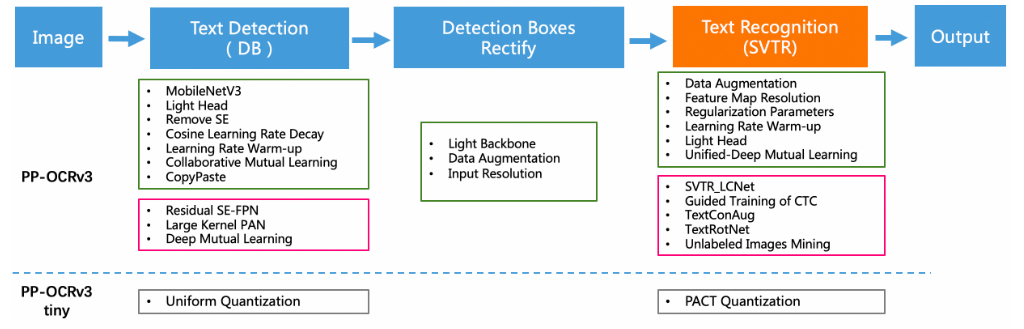

#### **OCR for transaction record**

In [5]:
from paddleocr import PaddleOCR,draw_ocr
from IPython.display import Image

In [10]:
img_path = '/content/drive/MyDrive/Paddle/txn_image.PNG'
result = ocr.ocr(img_path, cls=True)
for line in result:
    print(line)

from PIL import Image
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores, font_path='/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')

[2022/10/03 07:42:54] ppocr DEBUG: dt_boxes num : 28, elapse : 0.17291545867919922
[2022/10/03 07:42:54] ppocr DEBUG: cls num  : 28, elapse : 0.32500481605529785
[2022/10/03 07:42:57] ppocr DEBUG: rec_res num  : 28, elapse : 3.1716084480285645
[[[641.0, 13.0], [700.0, 13.0], [700.0, 31.0], [641.0, 31.0]], ('Deposits', 0.9997211694717407)]
[[[9.0, 14.0], [45.0, 14.0], [45.0, 33.0], [9.0, 33.0]], ('Date', 0.9995793104171753)]
[[[71.0, 15.0], [254.0, 15.0], [254.0, 32.0], [71.0, 32.0]], ('Transaction type and details', 0.9737339019775391)]
[[[498.0, 14.0], [581.0, 14.0], [581.0, 32.0], [498.0, 32.0]], ('Withdrawals', 0.9992721676826477)]
[[[767.0, 13.0], [823.0, 16.0], [822.0, 33.0], [766.0, 31.0]], ('Balance', 0.9998102784156799)]
[[[9.0, 38.0], [55.0, 38.0], [55.0, 55.0], [9.0, 55.0]], ('15 Jun', 0.9999530911445618)]
[[[101.0, 39.0], [214.0, 39.0], [214.0, 55.0], [101.0, 55.0]], ('Opening balance', 0.9982173442840576)]
[[[755.0, 38.0], [822.0, 38.0], [822.0, 55.0], [755.0, 55.0]], ('70,

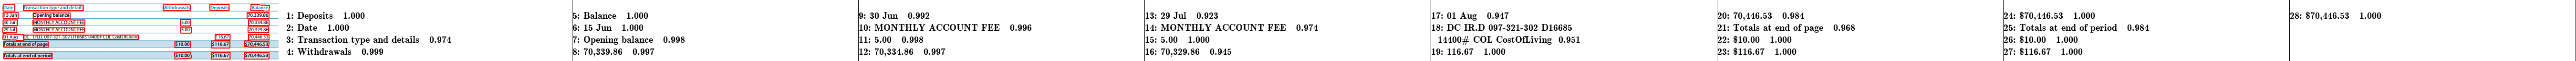

In [11]:
im_show

#### **OCR for bank statement**

In [12]:
img_path = '/content/drive/MyDrive/Paddle/home_loan_image.PNG'
result = ocr.ocr(img_path, cls=True)
for line in result:
    print(line)

from PIL import Image
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores, font_path='/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')

[2022/10/03 07:45:02] ppocr DEBUG: dt_boxes num : 43, elapse : 0.37657952308654785
[2022/10/03 07:45:02] ppocr DEBUG: cls num  : 43, elapse : 0.35181665420532227
[2022/10/03 07:45:07] ppocr DEBUG: rec_res num  : 43, elapse : 5.092232942581177
[[[360.0, 12.0], [825.0, 12.0], [825.0, 30.0], [360.0, 30.0]], ('ANZ HOME LOAn StAtEMEnt', 0.7189515233039856)]
[[[636.0, 47.0], [827.0, 47.0], [827.0, 60.0], [636.0, 60.0]], ('Account number 1010-10101', 0.9795773029327393)]
[[[6.0, 101.0], [204.0, 100.0], [204.0, 121.0], [6.0, 122.0]], ('Transaction details', 0.9989392161369324)]
[[[6.0, 127.0], [333.0, 128.0], [333.0, 143.0], [6.0, 142.0]], ('Please retain this statement for taxation purposes', 0.9682985544204712)]
[[[6.0, 166.0], [40.0, 166.0], [40.0, 181.0], [6.0, 181.0]], ('Date', 0.9984796643257141)]
[[[62.0, 167.0], [217.0, 167.0], [217.0, 180.0], [62.0, 180.0]], ('Transaction description', 0.9856520891189575)]
[[[467.0, 165.0], [533.0, 165.0], [533.0, 182.0], [467.0, 182.0]], ('Debits ($)

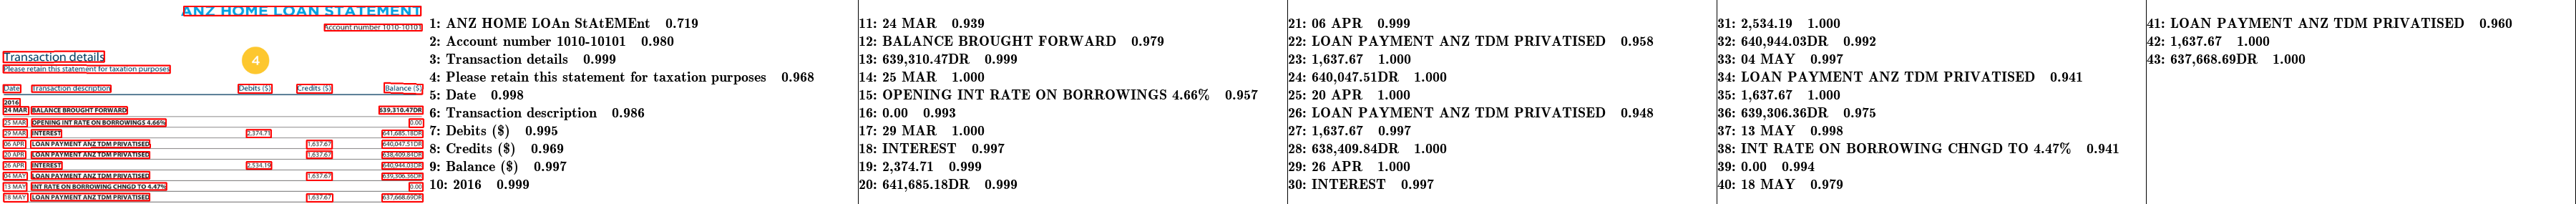

In [13]:
im_show

#### **OCR for bill payment**

In [15]:
img_path = '/content/drive/MyDrive/Paddle/vodafone.jpg'
result = ocr.ocr(img_path, cls=True)
for line in result:
    print(line)

from PIL import Image
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores, font_path='/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')

[2022/10/03 07:47:30] ppocr DEBUG: dt_boxes num : 16, elapse : 0.254244327545166
[2022/10/03 07:47:30] ppocr DEBUG: cls num  : 16, elapse : 0.13724637031555176
[2022/10/03 07:47:33] ppocr DEBUG: rec_res num  : 16, elapse : 2.1752121448516846
[[[510.0, 52.0], [670.0, 52.0], [670.0, 72.0], [510.0, 72.0]], ('Account number', 0.9732841849327087)]
[[[26.0, 56.0], [138.0, 56.0], [138.0, 76.0], [26.0, 76.0]], ('Hi User.001,', 0.9429882168769836)]
[[[512.0, 85.0], [639.0, 85.0], [639.0, 109.0], [512.0, 109.0]], ('100010531', 0.9994530081748962)]
[[[29.0, 109.0], [444.0, 109.0], [444.0, 126.0], [29.0, 126.0]], ('Your latest Vodafone bill for account 100010531', 0.9086658358573914)]
[[[28.0, 140.0], [171.0, 140.0], [171.0, 158.0], [28.0, 158.0]], ('is now available.', 0.9491448402404785)]
[[[510.0, 150.0], [659.0, 150.0], [659.0, 170.0], [510.0, 170.0]], ('Invoice number', 0.9543240666389465)]
[[[512.0, 191.0], [652.0, 191.0], [652.0, 212.0], [512.0, 212.0]], ('1000106453', 0.9984868764877319)]


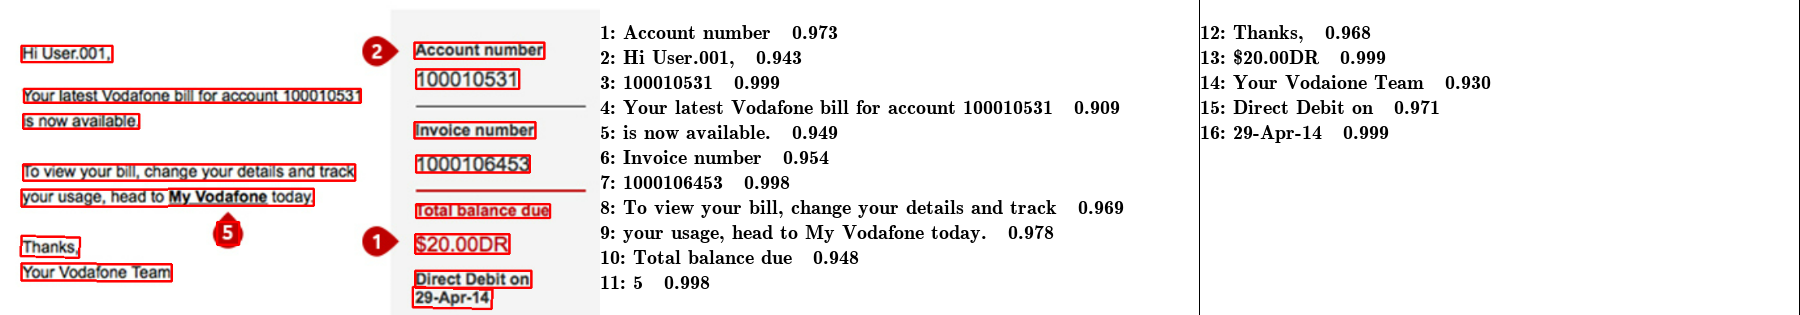

In [16]:
im_show

#### **Conclusion:**

We can see that PaddleOCR is very powerful to recognize different types of forms and documents. Combining with Robotic Process Automation(RPA) techniques, a lot of human intervention can be eliminated. 